# Part 1 - Climate Change

In [115]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [9]:
climate = pd.read_csv('../climate_change.csv')
climate.shape

(308, 11)

In [10]:
climate.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [17]:
train=climate[climate['Year']<=2006]
test=climate[climate['Year']>2006]

In [18]:
train.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [25]:
X_train=train[['MEI','CO2','CH4','N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols']]
#X_train.head()
y_train=train['Temp']
y_train.head()

0    0.109
1    0.118
2    0.137
3    0.176
4    0.149
Name: Temp, dtype: float64

In [26]:
X_test=test[['MEI','CO2','CH4','N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols']]
#X_test.head()
y_test=test['Temp']
y_test.head()

284    0.601
285    0.498
286    0.435
287    0.466
288    0.372
Name: Temp, dtype: float64

In [26]:
# Create linear regression object
regr = LinearRegression()

In [27]:
print regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [28]:
rm1=regr.fit(X=X_train, y=y_train)

In [29]:
# View the training model's coefficient
rm1.coef_

array([  3.13330213e+01,  -1.39110639e+01,  -5.22263917e+00,
         5.47806122e+01,   4.56213087e+00,   1.39834066e+01,
        -4.55371573e+00,   7.82112326e+00,   2.40196588e+01,
         9.82157762e+00,  -7.20435835e+00,  -3.05778066e+00,
         1.00254207e+01,   1.10884969e+01,   2.93265270e+01,
         3.43128981e+01,   1.62328460e-02,  -1.04774239e-01,
         1.16059890e+01,  -2.50381149e+01,  -9.56913757e+00,
         5.20972024e-03])

In [32]:
# View the R-Squared score
rm1.score(X=X_train, y=y_train)

0.75089327705234121

In [34]:
from sklearn.feature_selection import chi2

In [35]:
chi2, pval=chi2(X=X_train, y=y_train)

ValueError: Input X must be non-negative.

In [36]:
zip(['MEI','CO2','CH4','N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols'], rm1.coef_)

[('MEI', 0.064205313367525635),
 ('CO2', 0.0064573592723366699),
 ('CH4', 0.00012404189575248789),
 ('N2O', -0.016528003257474749),
 ('CFC-11', -0.0066304888893799173),
 ('CFC-12', 0.0038081032430233165),
 ('TSI', 0.093141083484999831),
 ('Aerosols', -1.5376132381050915)]

In [37]:
rm1.intercept_

-124.59426040111467

In [40]:
train.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.027942,-0.036988,0.982749,0.915659,0.993845,0.569106,0.897012,0.170302,-0.345247,0.786797
Month,-0.027942,1.000000,0.000885,-0.106732,0.018569,0.013632,-0.013111,0.000675,-0.034606,0.014890,-0.099857
MEI,-0.036988,0.000885,1.000000,-0.041147,-0.033419,-0.050820,0.069000,0.008286,-0.154492,0.340238,0.172471
CO2,0.982749,-0.106732,-0.041147,1.000000,0.877280,0.976720,0.514060,0.852690,0.177429,-0.356155,0.788529
CH4,0.915659,0.018569,-0.033419,0.877280,1.000000,0.899839,0.779904,0.963616,0.245528,-0.267809,0.703255
N2O,0.993845,0.013632,-0.050820,0.976720,0.899839,1.000000,0.522477,0.867931,0.199757,-0.337055,0.778639
CFC-11,0.569106,-0.013111,0.069000,0.514060,0.779904,0.522477,1.000000,0.868985,0.272046,-0.043921,0.407710
CFC-12,0.897012,0.000675,0.008286,0.852690,0.963616,0.867931,0.868985,1.000000,0.255303,-0.225131,0.687558
TSI,0.170302,-0.034606,-0.154492,0.177429,0.245528,0.199757,0.272046,0.255303,1.000000,0.052117,0.243383
Aerosols,-0.345247,0.014890,0.340238,-0.356155,-0.267809,-0.337055,-0.043921,-0.225131,0.052117,1.000000,-0.384914


In [42]:
feature_cols=['MEI', 'TSI', 'Aerosols','N2O']

X_train=train[feature_cols]
y_train=train['Temp']

rm1=regr.fit(X=X_train, y=y_train)

In [45]:
print rm1.intercept_
print zip(feature_cols, rm1.coef_)

# View the R-Squared score
print rm1.score(X=X_train, y=y_train)

-116.226858153
[('MEI', 0.064185755564454036), ('TSI', 0.079490279676339703), ('Aerosols', -1.7017370668724439), ('N2O', 0.025319745728983434)]
0.726132127951


In [47]:
train.columns

Index([u'Year', u'Month', u'MEI', u'CO2', u'CH4', u'N2O', u'CFC-11', u'CFC-12',
       u'TSI', u'Aerosols', u'Temp'],
      dtype='object')

In [49]:
#no step() function as in R !
feature_cols=['MEI', 'CO2', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']

X_train=train[feature_cols]
y_train=train['Temp']

rm1=regr.fit(X=X_train, y=y_train)

print rm1.intercept_
print zip(feature_cols, rm1.coef_)

# View the R-Squared score
print rm1.score(X=X_train, y=y_train)

-124.515177827
[('MEI', 0.06406778584122641), ('CO2', 0.0064014952361410478), ('N2O', -0.016021127549331649), ('CFC-11', -0.0066093511966573096), ('CFC-12', 0.0038675649279293952), ('TSI', 0.093115508853049381), ('Aerosols', -1.5402058231837921)]
0.750840896222


In [52]:
X_test=test[feature_cols]
y_pred=rm1.predict(X=X_test)

In [53]:
y_pred.shape

(24,)

In [54]:
X_test.shape

(24, 7)

In [71]:
from sklearn import metrics

#SSE=metrics.mean_squared_error(test['Temp'], y_pred) * (X_test.shape)[0]  # same as below
SSE=sum(np.square(test['Temp'] - y_pred))
SST=sum(np.square(test['Temp'] - np.mean(train['Temp'])))
print SSE
print SST

R2 = 1-(SSE/SST)
print R2

0.217644400524
0.586018854096
0.62860512251


# Part 2 - Reading Test Scores

In [38]:
pisaTrain=pd.read_csv('../pisa2009train.csv')
pisaTest=pd.read_csv('../pisa2009test.csv')
print pisaTrain.shape
print pisaTest.shape

(3663, 24)
(1570, 24)


In [3]:
pisaTrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [4]:
pisaTest.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [39]:
female_filter=pisaTrain['male']==1
pisaTrain[female_filter]['readingScore'].mean()

483.53247863247805

In [40]:
male_filter=pisaTrain['male']==0
pisaTrain[male_filter]['readingScore'].mean()

512.94063093244

In [41]:
pisaTrain.isnull().any()

grade                    False
male                     False
raceeth                   True
preschool                 True
expectBachelors           True
motherHS                  True
motherBachelors           True
motherWork                True
fatherHS                  True
fatherBachelors           True
fatherWork                True
selfBornUS                True
motherBornUS              True
fatherBornUS              True
englishAtHome             True
computerForSchoolwork     True
read30MinsADay            True
minutesPerWeekEnglish     True
studentsInEnglish         True
schoolHasLibrary          True
publicSchool             False
urban                    False
schoolSize                True
readingScore             False
dtype: bool

In [42]:
#Problem 1.4 - Removing missing values 
pisaTrain.dropna(inplace=True)
pisaTrain.shape

(2414, 24)

In [43]:
pisaTest.dropna(inplace=True)
pisaTest.shape

(990, 24)

In [44]:
pisaTrain.dtypes

grade                      int64
male                       int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork               float64
fatherHS                 float64
fatherBachelors          float64
fatherWork               float64
selfBornUS               float64
motherBornUS             float64
fatherBornUS             float64
englishAtHome            float64
computerForSchoolwork    float64
read30MinsADay           float64
minutesPerWeekEnglish    float64
studentsInEnglish        float64
schoolHasLibrary         float64
publicSchool               int64
urban                      int64
schoolSize               float64
readingScore             float64
dtype: object

In [47]:
pisaTrain['raceeth1']=pisaTrain['raceeth'].astype('category')
pisaTest['raceeth1']=pisaTest['raceeth'].astype('category')

In [48]:
pisaTrain.dtypes

grade                       int64
male                        int64
raceeth                    object
preschool                 float64
expectBachelors           float64
motherHS                  float64
motherBachelors           float64
motherWork                float64
fatherHS                  float64
fatherBachelors           float64
fatherWork                float64
selfBornUS                float64
motherBornUS              float64
fatherBornUS              float64
englishAtHome             float64
computerForSchoolwork     float64
read30MinsADay            float64
minutesPerWeekEnglish     float64
studentsInEnglish         float64
schoolHasLibrary          float64
publicSchool                int64
urban                       int64
schoolSize                float64
readingScore              float64
raceeth1                 category
dtype: object

In [49]:
pisaTrain['raceeth']=pisaTrain['raceeth1']
del pisaTrain['raceeth1']
print pisaTrain.dtypes
print " "
#
pisaTest['raceeth']=pisaTest['raceeth1']
del pisaTest['raceeth1']
print pisaTest.dtypes

grade                       int64
male                        int64
raceeth                  category
preschool                 float64
expectBachelors           float64
motherHS                  float64
motherBachelors           float64
motherWork                float64
fatherHS                  float64
fatherBachelors           float64
fatherWork                float64
selfBornUS                float64
motherBornUS              float64
fatherBornUS              float64
englishAtHome             float64
computerForSchoolwork     float64
read30MinsADay            float64
minutesPerWeekEnglish     float64
studentsInEnglish         float64
schoolHasLibrary          float64
publicSchool                int64
urban                       int64
schoolSize                float64
readingScore              float64
dtype: object
 
grade                       int64
male                        int64
raceeth                  category
preschool                 float64
expectBachelors           float6

In [50]:
#Reference Level for unordered factor varialbles
dummies = pd.get_dummies(pisaTrain['raceeth'])
#dummies
pisaTrain = pd.concat([pisaTrain, dummies], axis=1)
pisaTrain = pisaTrain.drop(['raceeth', 'White'], axis=1)
pisaTrain.head()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,readingScore,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander
1,11,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,1173.0,575.01,0,0,0,0,0,0
3,10,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1,2640.0,458.11,0,0,1,0,0,0
4,10,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1095.0,613.89,0,0,0,1,0,0
7,10,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,1913.0,439.36,0,0,0,0,0,0
9,10,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1,0,899.0,465.90,0,0,0,0,1,0


In [51]:
pisaTrain.dtypes

grade                                       int64
male                                        int64
preschool                                 float64
expectBachelors                           float64
motherHS                                  float64
motherBachelors                           float64
motherWork                                float64
fatherHS                                  float64
fatherBachelors                           float64
fatherWork                                float64
selfBornUS                                float64
motherBornUS                              float64
fatherBornUS                              float64
englishAtHome                             float64
computerForSchoolwork                     float64
read30MinsADay                            float64
minutesPerWeekEnglish                     float64
studentsInEnglish                         float64
schoolHasLibrary                          float64
publicSchool                                int64


In [52]:
dummies = pd.get_dummies(pisaTest['raceeth'])
#dummies
pisaTest = pd.concat([pisaTest, dummies], axis=1)
pisaTest = pisaTest.drop(['raceeth', 'White'], axis=1)
pisaTest.head()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,readingScore,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander
0,10,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,0,808.0,355.24,0,0,0,0,0,0
4,10,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,808.0,453.50,0,0,0,0,0,0
6,10,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,808.0,405.13,1,0,0,0,0,0
7,10,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,808.0,665.05,0,0,0,0,0,0
8,11,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,808.0,604.84,0,0,0,0,0,0


In [53]:
pisaTrain.dtypes

grade                                       int64
male                                        int64
preschool                                 float64
expectBachelors                           float64
motherHS                                  float64
motherBachelors                           float64
motherWork                                float64
fatherHS                                  float64
fatherBachelors                           float64
fatherWork                                float64
selfBornUS                                float64
motherBornUS                              float64
fatherBornUS                              float64
englishAtHome                             float64
computerForSchoolwork                     float64
read30MinsADay                            float64
minutesPerWeekEnglish                     float64
studentsInEnglish                         float64
schoolHasLibrary                          float64
publicSchool                                int64


In [66]:
#Problem 3.1 - Building a model 
# Create linear regression object
regr = LinearRegression()
print regr

#Fit the model
#feature_cols=['grade','male','raceeth','preschool','expectBachelors','motherHS','motherBachelors','motherWork','fatherHS','fatherBachelors','fatherWork','selfBornUS','motherBornUS','fatherBornUS','englishAtHome','computerForSchoolwork','read30MinsADay','minutesPerWeekEnglish','studentsInEnglish','schoolHasLibrary','publicSchool','urban','schoolSize']
feature_cols=['grade','male','preschool','expectBachelors','motherHS','motherBachelors','motherWork','fatherHS','fatherBachelors','fatherWork','selfBornUS','motherBornUS','fatherBornUS','englishAtHome','computerForSchoolwork','read30MinsADay','minutesPerWeekEnglish','studentsInEnglish','schoolHasLibrary','publicSchool','urban','schoolSize', 'American Indian/Alaska Native','Asian','Black','Hispanic','More than one race','Native Hawaiian/Other Pacific Islander']
X_train=pisaTrain[feature_cols]
y_train=pisaTrain['readingScore']
rm1=regr.fit(X=X_train, y=y_train)

print "Intercept= "
print rm1.intercept_

print zip(feature_cols, rm1.coef_)

# View the R-Squared score
print 'R-Squared= '
print rm1.score(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Intercept= 
143.766333432
[('grade', 29.542707091769412), ('male', -14.521653498087026), ('preschool', -4.4636703211839981), ('expectBachelors', 55.267080122768476), ('motherHS', 6.0587743172087869), ('motherBachelors', 12.638067794784064), ('motherWork', -2.8091006018441824), ('fatherHS', 4.0182135263400802), ('fatherBachelors', 16.929754698133095), ('fatherWork', 5.8427983425109158), ('selfBornUS', -3.8062779192930751), ('motherBornUS', -8.7981530829430099), ('fatherBornUS', 4.3069943195540716), ('englishAtHome', 8.0356853700053268), ('computerForSchoolwork', 22.500232339042999), ('read30MinsADay', 34.871924249903842), ('minutesPerWeekEnglish', 0.012788451494897046), ('studentsInEnglish', -0.28663077366759815), ('schoolHasLibrary', 12.215085016176918), ('publicSchool', -16.857475038515062), ('urban', -0.11013176238383515), ('schoolSize', 0.0065403814829636531), ('American Indian/Alaska Native', -67.277327102

In [76]:
#Problem 3.2 - Computing the root-mean squared error of the model 
from sklearn import metrics

#Predict with the train data
y_pred=rm1.predict(X_train)

from sklearn import metrics

#SSE=metrics.mean_squared_error(test['Temp'], y_pred) * (X_test.shape)[0]  # same as below
SSE=sum(np.square(y_train - y_pred))

#RMSE
RMSE=np.sqrt(SSE/len(y_pred))
print 'RMSE='
print RMSE

SST=sum(np.square(y_train - np.mean(y_train)))
print 'SST='
print SST

R2 = 1-(SSE/SST)
print 'R-Squared='
print R2

RMSE=
73.365551433
SST=
19253518.656
R-Squared=
0.325143355921


In [78]:
#Problem 3.3 - Comparing predictions for similar students 
29.5427 * (11-9)

59.0854

In [82]:
#Problem 3.5 - Identifying variables lacking statistical significance 
import statsmodels.api as sm
from scipy import stats

X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     41.04
Date:                Sun, 02 Jul 2017   Prob (F-statistic):          1.72e-180
Time:                        23:55:42   Log-Likelihood:                -13795.
No. Observations:                2414   AIC:                         2.765e+04
Df Residuals:                    2385   BIC:                         2.781e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------

In [83]:
X2

,const,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,schoolHasLibrary,publicSchool,urban,schoolSize,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander
1,1,11,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1,0,1173.0,0,0,0,0,0,0
3,1,10,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1,1,2640.0,0,0,1,0,0,0
4,1,10,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1,1,1095.0,0,0,0,1,0,0
7,1,10,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1,0,1913.0,0,0,0,0,0,0
9,1,10,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1,0,899.0,0,0,0,0,1,0
11,1,10,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1,0,1733.0,0,0,0,1,0,0
13,1,10,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1,0,149.0,0,0,0,0,0,0
14,1,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,1,1400.0,0,0,0,1,0,0
15,1,11,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1,1,1988.0,0,0,0,0,0,0
16,1,9,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0,1,915.0,0,0,0,0,0,0


In [85]:
#Problem 4.1 - Predicting on unseen data 
feature_cols=['grade','male','preschool','expectBachelors','motherHS','motherBachelors','motherWork','fatherHS','fatherBachelors','fatherWork','selfBornUS','motherBornUS','fatherBornUS','englishAtHome','computerForSchoolwork','read30MinsADay','minutesPerWeekEnglish','studentsInEnglish','schoolHasLibrary','publicSchool','urban','schoolSize', 'American Indian/Alaska Native','Asian','Black','Hispanic','More than one race','Native Hawaiian/Other Pacific Islander']
X_test=pisaTest[feature_cols]

#Predict
y_pred=rm1.predict(X=X_test)

In [86]:
print y_pred.shape

(990,)


In [92]:
print y_pred.min()
print y_pred.max()

353.223123114
637.691434909


In [93]:
y_pred.max()-y_pred.min()

284.46831179514209

In [97]:
test=pd.DataFrame(y_pred)
print test.describe()

                0
count  990.000000
mean   516.710339
std     52.034082
min    353.223123
25%    482.030498
50%    523.980207
75%    555.701125
max    637.691435


In [99]:
y_test=pisaTest['readingScore']

SSE = sum(np.square(y_pred - y_test))
print SSE

RMSE=np.sqrt(SSE/len(y_pred))
print RMSE

5762082.37114
76.2907938311


In [102]:
#Problem 4.3 - Baseline prediction and test-set SSE
#predicted test score used in the baseline model

trainMean=np.mean(pisaTrain['readingScore'])
print trainMean

SST = sum(np.square(y_test - trainMean))
print SST


517.962887324
7802354.07761


In [103]:
#Problem 4.4 - Test-set R-squared 

1-(SSE/SST)

0.26149437543769261

# Detecting Flu Epidemics via Search Engine Query Data 

In [105]:
FluTrain = pd.read_csv("../FluTrain.csv")
print FluTrain.shape
print FluTrain.dtypes

(417, 3)
Week        object
ILI        float64
Queries    float64
dtype: object


In [106]:
print FluTrain.describe()

              ILI     Queries
count  417.000000  417.000000
mean     1.676861    0.286028
std      1.126163    0.157697
min      0.534093    0.041169
25%      0.902459    0.156707
50%      1.252563    0.281541
75%      2.058690    0.378486
max      7.618892    1.000000


In [110]:
print FluTrain[FluTrain['ILI']==max(FluTrain['ILI'])]['ILI']

302    7.618892
Name: ILI, dtype: float64


In [113]:
FluTrain.iloc[302]

Week       2009-10-18 - 2009-10-24
ILI                        7.61889
Queries                          1
Name: 302, dtype: object

In [114]:
print FluTrain[FluTrain['Queries']==max(FluTrain['Queries'])]['Queries']

302    1.0
Name: Queries, dtype: float64


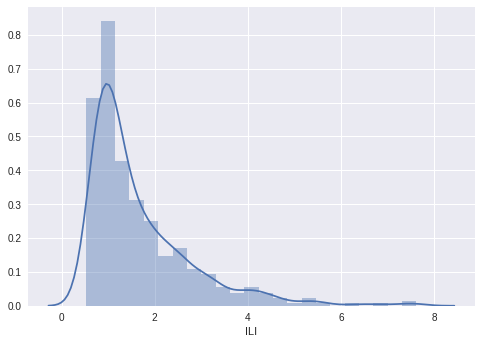

In [116]:
sns.distplot(FluTrain['ILI'])

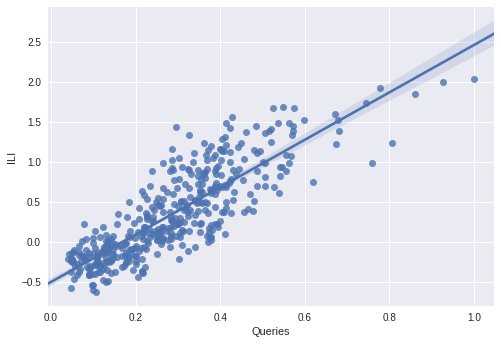

In [124]:

sns.regplot(x=FluTrain['Queries'], y=np.log(FluTrain['ILI']))

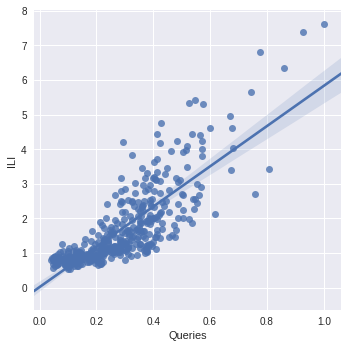

In [125]:
#Testing - compare with without LOG
sns.lmplot(x='Queries', y='ILI', data=FluTrain)

In [128]:
#Problem 2.2 - Linear Regression Model 

#prepare the data
feature_cols =  ['Queries']
X_train = FluTrain[feature_cols]
y_train = np.log(FluTrain['ILI'])

#Instantiate the model
FluTrend1 = LinearRegression()

#Train the model
FluTrend1.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
print "Intercept= "
print FluTrend1.intercept_

print zip(feature_cols, FluTrend1.coef_)

# View the R-Squared score
print 'R-Squared= '
print FluTrend1.score(X=X_train, y=y_train)

Intercept= 
-0.499343504064
[('Queries', 2.961292484940202)]
R-Squared= 
0.709020055348


In [130]:
FluTrain.corr()

,ILI,Queries
ILI,1.000000,0.814212
Queries,0.814212,1.000000


In [134]:
print np.square(0.814212)
print np.log(1/0.814212)
print np.exp(-0.5*0.814212)

0.662941180944
0.205534504628
0.665573635757


In [135]:
np.square(0.8420333)

0.70902007830889002

In [137]:
np.corrcoef(FluTrain['Queries'], FluTrain['ILI'])

array([[ 1.        ,  0.81421151],
       [ 0.81421151,  1.        ]])

In [139]:
FluTest=pd.read_csv('../FluTest.csv')
FluTest.shape

(52, 3)

In [140]:
X_test=FluTest[feature_cols]
y_test=FluTest["ILI"]

#Predict
y_pred=np.exp(FluTrend1.predict(X_test))


In [142]:
FluTest.head()

,Week,ILI,Queries
0,2012-01-01 - 2012-01-07,1.766707,0.593625
1,2012-01-08 - 2012-01-14,1.543401,0.499336
2,2012-01-15 - 2012-01-21,1.647615,0.500664
3,2012-01-22 - 2012-01-28,1.684297,0.479416
4,2012-01-29 - 2012-02-04,1.863542,0.471448


In [144]:
FluTest["Week"].str.contains('2012-03-11')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: Week, dtype: bool

In [145]:
y_pred[10]

2.1873777211145451

In [148]:
#Problem 3.2 - Performance on the Test Set 
(FluTest.iloc[10]['ILI'] - y_pred[10])/FluTest.iloc[10]['ILI']

0.046238266364746025

In [151]:
RMSE=np.sqrt(np.sum(np.square(FluTest['ILI']-y_pred))/len(y_pred))
RMSE

0.74906452710196503

In [152]:
FluTrain.shift(-2)

,Week,ILI,Queries
0,2004-01-18 - 2004-01-24,1.712024,0.225764
1,2004-01-25 - 2004-01-31,1.542495,0.237716
2,2004-02-01 - 2004-02-07,1.437868,0.224436
3,2004-02-08 - 2004-02-14,1.324274,0.207171
4,2004-02-15 - 2004-02-21,1.307257,0.241700
5,2004-02-22 - 2004-02-28,1.036977,0.216467
6,2004-02-29 - 2004-03-06,1.010320,0.225764
7,2004-03-07 - 2004-03-13,1.052492,0.199203
8,2004-03-14 - 2004-03-20,1.020090,0.134130
9,2004-03-21 - 2004-03-27,0.924419,0.138114


In [153]:
FluTrain

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436
5,2004-02-08 - 2004-02-14,1.324274,0.207171
6,2004-02-15 - 2004-02-21,1.307257,0.241700
7,2004-02-22 - 2004-02-28,1.036977,0.216467
8,2004-02-29 - 2004-03-06,1.010320,0.225764
9,2004-03-07 - 2004-03-13,1.052492,0.199203


In [157]:
FluTrain['ILILag2']=FluTrain['ILI']
FluTrain['ILILag2']=FluTrain['ILILag2'].shift(2)

In [158]:
FluTrain

,Week,ILI,Queries,ILILag2
0,2004-01-04 - 2004-01-10,2.418331,0.237716,NaN
1,2004-01-11 - 2004-01-17,1.809056,0.220452,NaN
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2.418331
3,2004-01-25 - 2004-01-31,1.542495,0.237716,1.809056
4,2004-02-01 - 2004-02-07,1.437868,0.224436,1.712024
5,2004-02-08 - 2004-02-14,1.324274,0.207171,1.542495
6,2004-02-15 - 2004-02-21,1.307257,0.241700,1.437868
7,2004-02-22 - 2004-02-28,1.036977,0.216467,1.324274
8,2004-02-29 - 2004-03-06,1.010320,0.225764,1.307257
9,2004-03-07 - 2004-03-13,1.052492,0.199203,1.036977


In [167]:
#Problem 4.1 - Training a Time Series Model 
FluTrain['ILILag2'].isnull().sum()

2

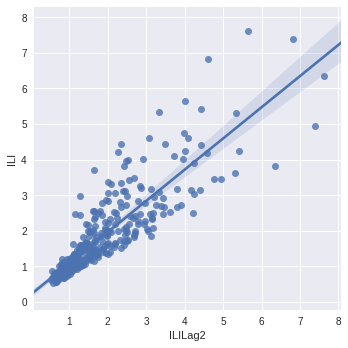

In [170]:
sns.lmplot(x='ILILag2', y='ILI', data=FluTrain)

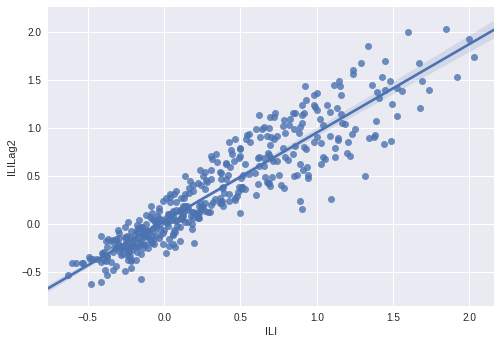

In [172]:
sns.regplot(x=np.log(FluTrain['ILI']), y=np.log(FluTrain['ILILag2']))

In [183]:
print FluTrain.shape

FluTrain2 = FluTrain.dropna()
print FluTrain2.shape

FluTrain2['LogILILag2']=np.log(FluTrain2['ILILag2'])
feature_cols=['Queries', 'LogILILag2']
X_train = FluTrain2[feature_cols]
y_train=np.log(FluTrain2['ILI'])

#Instantiate
FluTrend2=LinearRegression()

#Train
FluTrend2.fit(X=X_train, y=y_train)


(417, 5)
(415, 5)


/home/guest/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
print zip(feature_cols, FluTrend2.coef_)

[('Queries', 1.2557761616414109), ('LogILILag2', 0.65568964908955629)]


In [185]:
FluTrend2.score(X=X_train, y=y_train)

0.90634144454906762

In [186]:
import statsmodels.api as sm
from scipy import stats

X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ILI   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1993.
Date:                Tue, 04 Jul 2017   Prob (F-statistic):          1.38e-212
Time:                        08:28:30   Log-Likelihood:                 147.24
No. Observations:                 415   AIC:                            -288.5
Df Residuals:                     412   BIC:                            -276.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2406      0.020    -12.321      0.0

In [187]:
FluTest['ILILag2']=FluTest['ILI']
FluTest['ILILag2']=FluTest['ILILag2'].shift(2)

#Problem 5.1 - Evaluating the Time Series Model in the Test Set  
FluTest['ILILag2'].isnull().sum()

2

In [188]:
FluTrain.shape

(417, 5)

In [198]:
FluTrain.tail(5)

,Week,ILI,Queries,ILILag2,LogILILag2
412,2011-11-27 - 2011-12-03,1.465723,0.478088,1.462212,0.379950
413,2011-12-04 - 2011-12-10,1.518106,0.464807,1.655415,0.504052
414,2011-12-11 - 2011-12-17,1.663954,0.479416,1.465723,0.382349
415,2011-12-18 - 2011-12-24,1.852736,0.537849,1.518106,0.417464
416,2011-12-25 - 2011-12-31,2.124130,0.618858,1.663954,0.509197


In [200]:
x=0
y=415
FluTest['ILILag2'][x]=FluTrain['ILI'][y]

x=1
y=416
FluTest['ILILag2'][x]=FluTrain['ILI'][y]

FluTest.head()


/home/guest/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/guest/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Week,ILI,Queries,ILILag2
0,2012-01-01 - 2012-01-07,1.766707,0.593625,1.852736
1,2012-01-08 - 2012-01-14,1.543401,0.499336,2.124130
2,2012-01-15 - 2012-01-21,1.647615,0.500664,1.766707
3,2012-01-22 - 2012-01-28,1.684297,0.479416,1.543401
4,2012-01-29 - 2012-02-04,1.863542,0.471448,1.647615


In [210]:
FluTest['LogILILag2']=np.log(FluTest['ILILag2'])
feature_cols=['Queries', 'LogILILag2']
X_test = FluTest[feature_cols]
y_test=FluTest['ILI']

y_pred=np.exp(FluTrend2.predict(X_test))

print y_test.shape
print y_pred.shape
print y_pred[:5]

(52,)
(52,)
[ 2.48223609  2.41182911  2.14094133  1.90781698  1.97150421]


In [212]:
SSE = np.sum(np.square(y_test - y_pred))
print SSE

RMSE=np.sqrt(SSE/len(y_test))
print RMSE

4.50087659104
0.294202853587
